# Task 10.1. Segmentation by growth
---
***Author: Piotr Skalski***

## 1. Imports

In [1]:
import numpy as np
import cv2
import os
import pprint
from tqdm import tqdm

import display_util

import matplotlib.pyplot as plt
%matplotlib inline

## 2. Primary settings

In [2]:
SOURCE_DIR = "./../data/"
IMAGE_NAME = "knee.png"

## 3. Loading images

In [3]:
# building path to file
image_path = os.path.join(SOURCE_DIR, IMAGE_NAME)
# loading files
image = cv2.imread(image_path, 0)

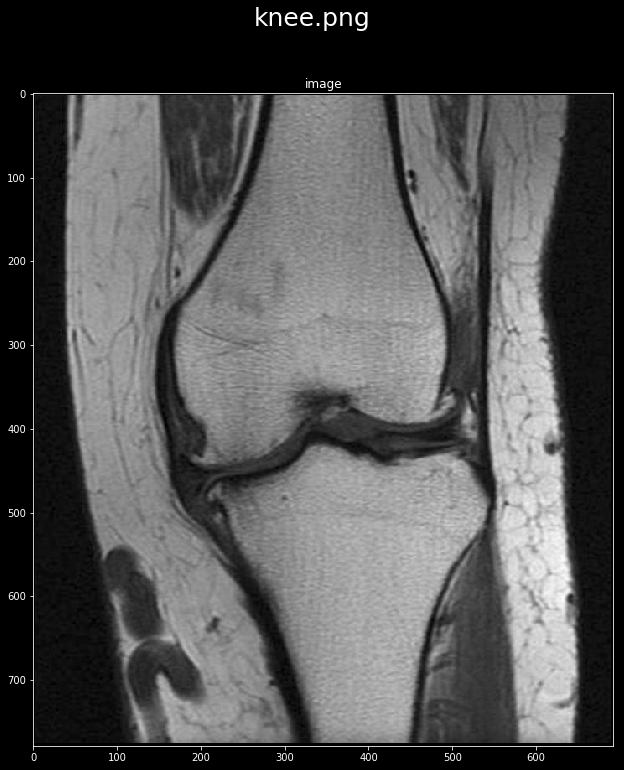

In [4]:
display_util.image(image, IMAGE_NAME, size=(12,12))

## 4. The growing region method

### 4.1. Settings

In [152]:
START_POINT = (200, 350)
IMAGE = np.copy(image).astype(int)

### 4.2. Implementation

In [153]:
def validate_point(point, imageHeight, imageWidth):
    return point[0] > 0 and  point[0] < imageHeight - 1 and point[1] > 0 and  point[1] < imageWidth - 1

In [154]:
def get_neighborhood(point):
    return [
        (point[0] - 1, point[1] - 1),
        (point[0] - 1, point[1]),
        (point[0] - 1, point[1] + 1),
        (point[0], point[1] - 1),
        (point[0], point[1] + 1),
        (point[0] + 1, point[1] - 1),
        (point[0] + 1, point[1]),
        (point[0] + 1, point[1] + 1)
    ]

In [166]:
def segmentation(image, start_point, threshold = 4):
    image_shape = image.shape
    visited = np.zeros(image_shape)
    segmented = np.zeros(image_shape)
    stack = []
    
    stack.append(start_point)
    visited[start_point] = 1
    segmented[start_point] = image[start_point]
    
    while (len(stack)):
        reference_point = stack.pop()
        reference_point_value = image[reference_point]
        neighborhood = get_neighborhood(reference_point)
        for index, point in enumerate(neighborhood):
            if visited[point] == 1:
                continue
            if not validate_point(point, image_shape[0], image_shape[1]):
                continue
                
            visited[point] = 1
            point_value = image[point]
            
            if(abs(reference_point_value - point_value) < threshold):
                stack.append(point)
                segmented[point] = image[point]
                
    return segmented

In [167]:
image_segmented = segmentation(IMAGE, START_POINT)

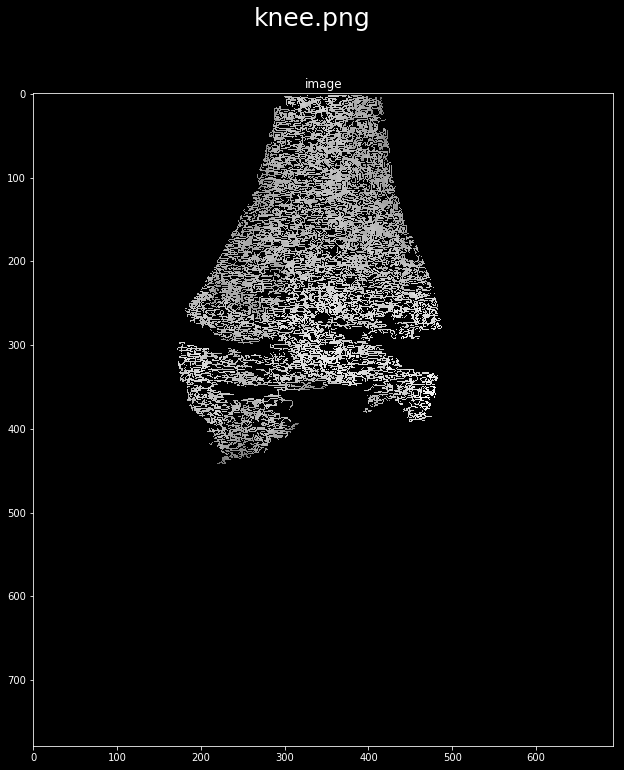

In [168]:
display_util.image(image_segmented, IMAGE_NAME, size=(12,12))

In [180]:
def segmentation_mean_value(image, start_point, threshold = 50):
    image_shape = image.shape
    visited = np.zeros(image_shape)
    segmented = np.zeros(image_shape)
    stack = []
    mean = 0
    count = 0
    
    stack.append(start_point)
    visited[start_point] = 1
    segmented[start_point] = image[start_point]
    mean += image[start_point]
    count += 1
    
    while (len(stack)):
        reference_point = stack.pop()
        count += 1
        mean = (mean * (count-1) + image[reference_point]) / count
        reference_point_value = mean
        neighborhood = get_neighborhood(reference_point)
        for index, point in enumerate(neighborhood):
            if visited[point] == 1:
                continue
            if not validate_point(point, image_shape[0], image_shape[1]):
                continue
                
            visited[point] = 1
            point_value = image[point]
            
            if(abs(reference_point_value - point_value) < threshold):
                stack.append(point)
                segmented[point] = image[point]
                
    return segmented

In [181]:
image_segmented_mean_value = segmentation_mean_value(IMAGE, START_POINT)

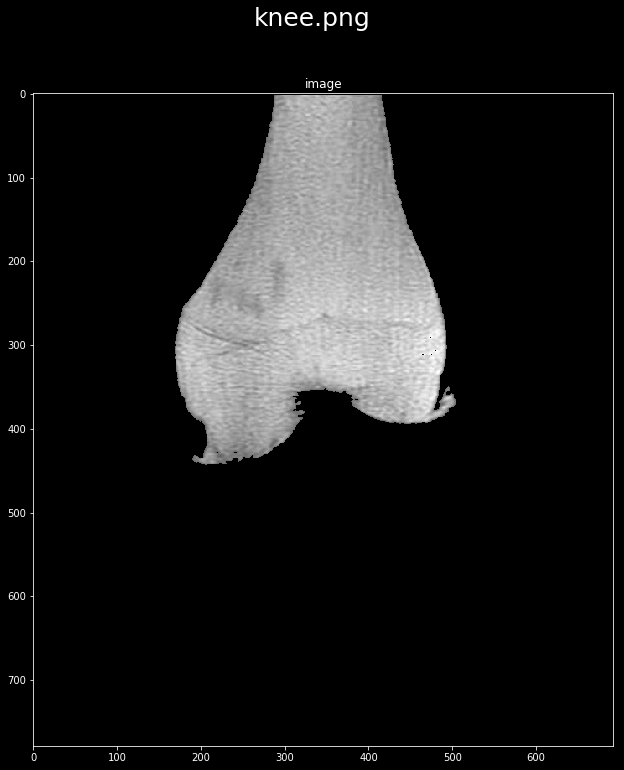

In [182]:
display_util.image(image_segmented_mean_value, IMAGE_NAME, size=(12,12))